In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/HW1Colab

[Errno 2] No such file or directory: '/content/drive/MyDrive/HW1Colab'
/content


#**DS220: Project 2: An Introduction to U.S Cancer Regression**
###**Data Analysis with Python Pandas - Patrick Erickson**
####Team Members - Zack Ranjan, Joshua Santiago
> Professor Mathias Fonkman


##**Part 1: Introduction of the Dataset**



In this Jupyter Notebook, I have conducted data analysis of a Cancer-Regression Dataset, using visualization tools to investigate the research questions that were formed. This analysis was conducted within a group of 3 members, as data analysis tools were shared and brainstorming sessions were held to understand the dataset in greater detail. While the work concerning the research questions and data analysis was split between my teammates and I, we took our own paths on establishing our insights and derivations from the data, simply assigning tasks regarding each stage of the project to each member. This allowed for an even split between tasks, and efficient collaboration. My responsibility was to help brainstorm research questions that would encapsulate the necessary queries required for this project and assisted in creating these queries while ensuring the validity and functionality of the hypothesis test as well. I also wrote wrote all of the code for the hypothesis test (Part 3). I utilized some of the cleaned data from previous sections, however (Courtesy of Josh). I was also in charge of the final thoughts and concluding statements as well. I also came up with the hypothesis test, as well as decide which parameters to test. I also collaborated with Zack when writing the code for the hypothesis tests, taking insight from her previous histogram blocks, then applying my numpy and python insight to taylor it fit the model needed.
<br>


Firstly, the overarching dataset was found at Kaggle __[link text](https://www.kaggle.com/datasets/varunraskar/cancer-regression?select=cancer_reg.csv)__ which is an online platform containing public datasets for analysis, exploration, and sharing. Secondly, the dataset contains two .csv files, the first "cancer_reg.csv" is an overview of comprehensive data relating to Cancer within the United States, with information collected from 2010 to 2016 (recorded by government channels such the National Cancer Institute and the National Library of Medicine). The second file "avg-household-size.csv" is an overview of data aggregated from the American Community Survey (census.gov) in the year 2015 to 2016. The sources for the dataset are credible and help provide comprehesive information to perform data analysis.
<br>
The project aims to allow readers to understand the analysis of cancer data by providing insights into the graphs and charts they are viewing, which help further their understanding from not just visual tools like the graphs, but also associating the data with questions that may arise from the initial interpretation of the data. The analysis of the data was conducted through several steps: loading the dataset, exploratory data analysis, data cleaning, statistical inference and visualizations, and the conclusion.

### **Section 1: Importing the Libraries**
To develop data visualization and code to support analysis, I chose to initalize and integrate libraries such as **pandas**, **numpy**, and **matplotlib** and **seaborn**, which help improve the notebook's capabilities. Features such as matplotlib and seaborn are essential in enhancing the aesthetically engaging visualizations of the data as they present the relevant code snippets required. The pandas and numpy libraries are included to provide us with powerful tools that maximize data manipulation and analysis.  
<br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

### **Section 2: Loading the Datasets**
To incorporate the comprehensive dataset, I was able to load two datasets with the .csv files, called *Cancer Data*, and *Household Data*. Cancer Data included **33** columns, and **3047** rows of information (e.g., avganncount, avgdeathsperyear, target_deathrate, incidencerate, medincome, popest2015, povertypercent, studypercap, etc.) For ease of understanding, I have defined and described each relevant column below: (Note that these are the labels from the raw data, which have not been renamed yet)
> 1. **avganncount**: Average number of cancer cases diagnosed annually.
> 2. **avgdeathsperyear**: Average number of deaths due to cancer per year.
> 3. **target_deathrate**: Target death rate due to cancer.
> 4. **incidencerate**: Incidence rate of cancer.
> 5. **medincome**: Median income in the region.
> 6. **popest2015**: Estimated population in 2015.
> 7. **povertypercent**: Percentage of population below the poverty line.
> 8. **studypercap**: Per capita number of cancer-related clinical trials conducted.
> 9. **binnedinc**: Binned median income.
> 10. **medianage**: Median age in the region.
> 11. **medianagemale**: Median age of males in the region.
> 12. **medianagefemale**: Median age of females in the region.
> 13. **geography**: The geographical location, represented as the county or census area name followed by the state name.
> 14. **pctemployed16_over**: Percentage of population aged 16 and over that are employed.
> 15. **pctunemployed16_over**: Percentage of population aged 16 and over that are unemployed.
> 16. **pctprivatecoveragealone**: Percentage of population covered by private health insurance alone.
> 17. **pctempprivcoverage**: Percentage of population covered by employee-provided private health insurance.
> 18. **pctpubliccoverage**: Percentage of population covered by public health insurance.
> 19. **pctpubliccoveragealone**: Percentage of population covered by public health insurance only.
> 20. **pctwhite**: Percentage of White population.
> 21. **pctblack**: Percentage of Black population.
> 22. **pctasian**: Percentage of Asian population.
> 23. **pctotherrace**: Percentage of population belonging to other races.
> 24. **pctmarried**: Percentage of population that is married.
> 25. **pctmarriedhouseholds**: Percentage of married households.
> 26. **birthrate**: Rate of birth within the region.

For the purposes of this project, the following columns are not included in the analysis, since the questions and insights evaluated do not concern them. These include: pctnohs18_24, pcths18_24, pctsomecol18_24, pctbachdeg18_24, pcths25_over, pctbachdeg25_over, and pctbachdeg25_over. They include data about Percentage of people not in/in high school, college, with a bachelors degree, between 18 to 24 years of age, and 25 and over.
<br>
Household Data included **4** columns and **3220** records of information (e.g., statefips, countyfips, avghouseholdsize, and geography). "geography" is a common column between the two datasets (significant when merging later in the project), and holds the same definition as defined earlier. For the other three colums:
> 1. **statefips**: The FIPS code representing the state.
> 2. **countyfips**: The FIPS code representing the county or census area within the state.
> 3. **avghouseholdsize**: The average household size in the region.

A Federal Information Processing Standard (FIPS) code is a number that uniquely identifies a geographic area, such as a state or county. Furthermore, they are relevant and significant to differentiate Counties within States that may have the same or similar names.

In [ ]:
# Load the datasets
cancer_data = pd.read_csv('cancer_reg.csv')
household_data = pd.read_csv('avg-household-size.csv')

In [ ]:
cancer_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [ ]:
household_data

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"
...,...,...,...,...
3215,56,37,2.64,"Sweetwater County, Wyoming"
3216,56,39,2.63,"Teton County, Wyoming"
3217,56,41,2.76,"Uinta County, Wyoming"
3218,56,43,2.34,"Washakie County, Wyoming"


##**Part 2: Exploratory Data Analysis**
It is necessary to examine the data being analyzed before conducting any investigations into it. To gain a deeper understanding of the datasets, I attempt to see the top 5 and bottom 5 rows of each dataset. Considering the importance of understanding the shape of the datasets, I also check the total number of rows and columns present. Additionally, I examine the data types and non-null values of the columns present in each dataset.

In [ ]:
# Display the first few rows of the cancer dataset
cancer_data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
# Display the first few rows of the household dataset
household_data.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [ ]:
# Get the shape of the cancer dataset and household dataset
print("Cancer Data Shape:", cancer_data.shape)
print("Household Data Shape:", household_data.shape)

Cancer Data Shape: (3047, 33)
Household Data Shape: (3220, 4)


In [ ]:
# Get information about the cancer_data dataset, including data types and non-null values of all the columns
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

From the results visible above, it is evident that several of the columns (**28**, to be precise) are of the **float64** data type: a floating-point number format, usually occupying 64 bits in computer memory.
<br>
**3** columns are of the **int64** data type: Python is storing each value within these column as a 64 bit integer. There are **2** columns of the **object** data type, meaning that within those columns, data is included in the form of string values.
<br>
It is also important to note that some columns with non-null values have fewer than the total number of rows, since there are 3047 rows total. This indicates that some values within the cancer_data dataset are missing.

In [ ]:
# Get information about the household_data dataset, including data types and non-null values of all the columns
household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


From the results visible above, it is evident that **2** columns are of the **int64** data type, **1** column of the **object** data type, and **1** column of the **float64** data type.

In [ ]:
# Get statistics for the numerical columns present in cancer_data
cancer_data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [ ]:
# Get statistics for the numerical columns present in household_data
household_data.describe()

,statefips,countyfips,avghouseholdsize
count,3220.000000,3220.000000,3220.000000
mean,31.290683,102.922050,2.540755
std,16.277207,106.693846,0.267654
min,1.000000,1.000000,1.370000
25%,19.000000,35.000000,2.380000
50%,30.000000,79.000000,2.510000
75%,46.000000,133.000000,2.650000
max,72.000000,840.000000,4.730000


As seen in the results above, there are several numerical columns within the two datasets, but for the purposes of this investigation, we will only focus on the ones described in **Section 2** of this notebook.

### **Section 3: Data Cleaning**
Clean data is essential for any analysis, visualization, and intepretation of data. In this section, the datasets will be cleaned to ensure that there are no underlying missing values and unnecessary information.

In [ ]:
#Check for missing values in each column of cancer_data
cancer_data.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [ ]:
#Check for missing values in each column of household_data
household_data.isnull().sum()

statefips           0
countyfips          0
avghouseholdsize    0
geography           0
dtype: int64

As seen above, household_data contains no missing values in each of its columns. However, cancer_data has columns pctsomecol18_24, pctemployed16_over, pctprivatecoveragealone, that have several missing values. Since this investigation is concerned with **pctemployed16_over** and **pctprivatecoveragealone** columns that hold information on employmment and health insurance coverage, it is essential to deal with their missing values.
<br>
Since we cannot assume the percentage of population that is employed over the age of 16 or the percentage that has private coverage alone, we can substitute those values with a string indicating that the data is not available. Any possible duplicates can also be dropped.  

In [ ]:
cancer_data['pctsomecol18_24'].fillna("Data not available", inplace=True)
cancer_data['pctemployed16_over'].fillna("Data not available", inplace=True)
cancer_data['pctprivatecoveragealone'].fillna("Data not available", inplace=True)

In [ ]:
cancer_data.drop_duplicates(inplace=True)
household_data.drop_duplicates(inplace=True)

In [ ]:
cancer_data.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctsomecol18_24            0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
dtype: int64

As seen in the result above, the missing values were handled correctly and cancer_data now contains no null values.
<br>
To effectively perform analysis and present an overall understanding of the datasets, the best approach is to merge the datasets together using the common column **geography**.

In [ ]:
merged_data = pd.merge(cancer_data, household_data, on='geography', how='inner')

Additionally, renaming the columns to a consistent naming convention that is more legible will help readers understand the dataset further.

In [ ]:
merged_data = merged_data.rename(columns={
    'avganncount': 'avgcasecount',
    'medincome': 'medianincome',
    'studypercap': 'clintrialspercap',
    'pctprivatecoverage': 'pctprivcoverage',
    'pctprivatecoveragealone': 'pctprivcoveragealone',
    'pctempprivcoverage': 'pcttempprivcoverage',
    'geography': 'location'
})

In [ ]:
#view of top 5 rows post relabeling
merged_data.head()

,avgcasecount,avgdeathsperyear,target_deathrate,incidencerate,medianincome,popest2015,povertypercent,clintrialspercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34


### **Section 4: Data Analysis and Visualizations**
This section will be concerned with develping the visualizations and analysis of the data based on the reseach questions and my interpretations of the datasets.  
<br>
**Research Question 1**: What are the regions with the highest average number of cancer cases diagnosed annually?


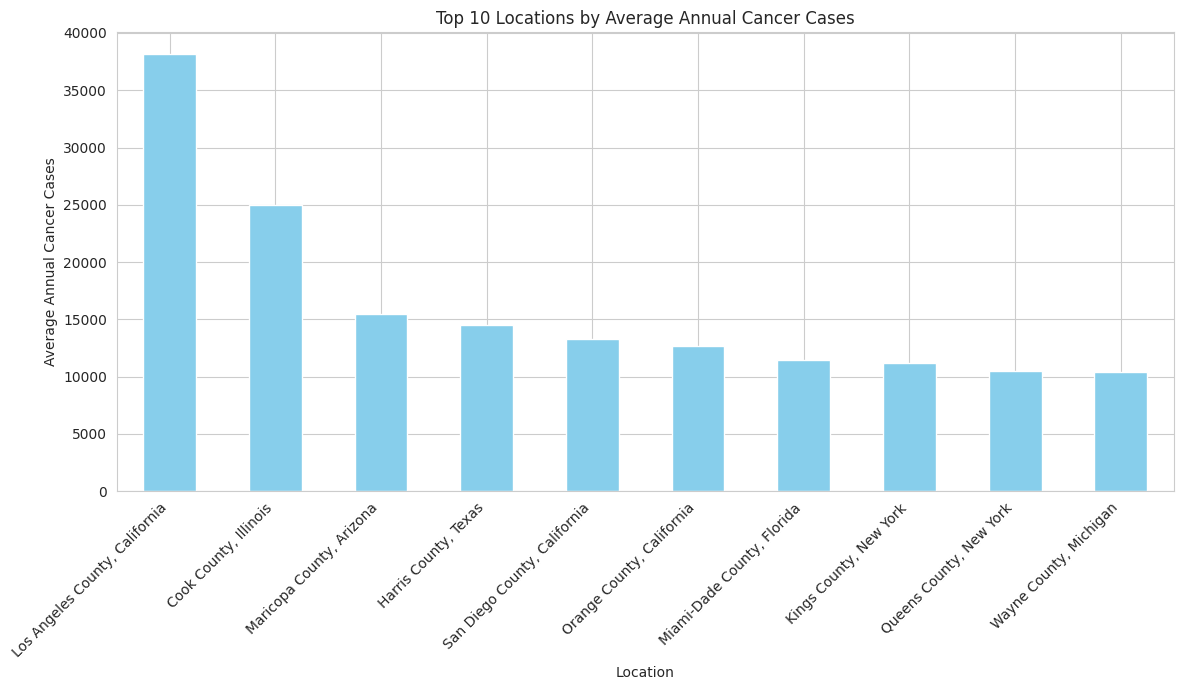

In [ ]:
# States with the highest average number of cancer cases diagnosed annually
top_avg_cases = merged_data.groupby('location')['avgcasecount'].mean().sort_values(ascending=False).head(10)
top_avg_cases.plot(kind='bar', figsize=(12, 7), color='skyblue')
plt.title('Top 10 Locations by Average Annual Cancer Cases')
plt.ylabel('Average Annual Cancer Cases')
plt.xlabel('Location')
plt.xticks(rotation=45, ha="right")  # Rotate labels to avoid overlap
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

This code above groups the data by the **location** column, which combines county and state information for a more detailed geographic description. It then calculates the mean of the **avgcasecount** for each location, sorts these values in descending order to find the **top 10 locations** with the highest average annual cancer cases, and plots these as a bar chart. The plt.xticks(rotation=45, ha="right") line rotates the x-axis labels to avoid overlap, making the chart easier to read.
<br>
As seen above, the **Los Angeles County** in California has the highest Average Annual Cancer Cases among all Counties and States in the U.S.

**Research Question 2**: To what extent is the number of clinical trials per capita conducted within these regions associated with the majority type of health insurance covering the population?

First, we need to determine whether the majority of the population in each region is covered by public or private health insurance. This can be done by comparing the **percentages of private coverage** (pctprivcoverage) and of **public coverage** (pctpubliccoverage) for each region.


In [ ]:
# Determine the majority type of health insurance coverage in each region
merged_data['majority_insurance_type'] = np.where(merged_data['pctprivcoverage'] > merged_data['pctpubliccoverage'], 'Private', 'Public')

We can then analyze the relationship between the majority insurance type and clinical trials per capita. A simple way to start is by comparing the average **clintrialspercap** between regions with a majority of private vs. public insurance coverage. The mean for each insurance type is also visible in the output below.

In [ ]:
# Group by majority insurance type and calculate the mean clinical trials per capita
insurance_clinical_trials = merged_data.groupby('majority_insurance_type')['clintrialspercap'].mean()

insurance_clinical_trials

majority_insurance_type
Private    160.061859
Public      75.999932
Name: clintrialspercap, dtype: float64

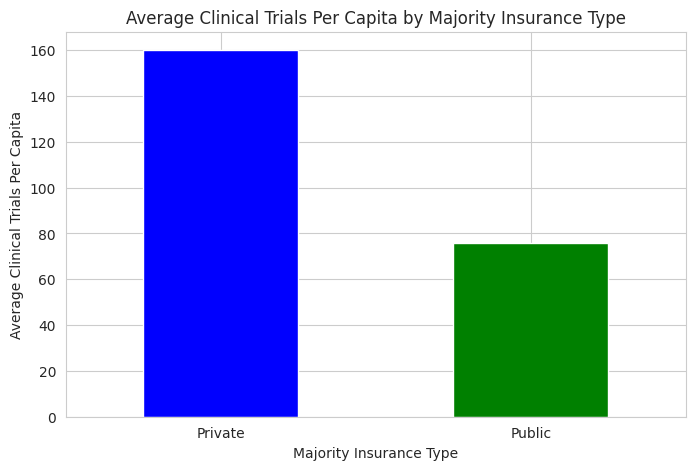

In [ ]:
insurance_clinical_trials.plot(kind='bar', figsize=(8, 5), color=['blue', 'green'])
plt.title('Average Clinical Trials Per Capita by Majority Insurance Type')
plt.ylabel('Average Clinical Trials Per Capita')
plt.xlabel('Majority Insurance Type')
plt.xticks(rotation=0)  # Keep the labels horizontal for clarity
plt.show()

To visualize the data can help in understanding the association better, a bar plot can be used to compare the average number of clinical trials per capita between regions with a majority of public vs. private insurance coverage. As seen in the graph above, there are higher numbers of clinical trials conducted with Private insurance. This could suggest that regions with higher private insurance coverage are more likely to participate in or have access to clinical trials. This could be due to a variety of factors, including healthcare infrastructure, income levels, or the presence of research institutions, which might correlate with insurance coverage types. Some of these factors will be explored in questions during this project.

**Research Question 3**: What are the regions with the highest average number of deaths due to cancer?

To visualize and analyze this question, it is necessary to calculate the average number of deaths based on the regions, and then sort these locations in descending order. Then the top 20 regions can be used to visualize the data.

In [ ]:
# Calculate the average number of deaths due to cancer by location
deaths_location = merged_data.groupby('location')['avgdeathsperyear'].mean().reset_index()
deaths_location

,location,avgdeathsperyear
0,"Abbeville County, South Carolina",61.0
1,"Acadia Parish, Louisiana",151.0
2,"Accomack County, Virginia",106.0
3,"Ada County, Idaho",561.0
4,"Adair County, Iowa",22.0
...,...,...
3042,"Yukon-Koyukuk Census Area, Alaska",11.0
3043,"Yuma County, Arizona",291.0
3044,"Yuma County, Colorado",24.0
3045,"Zapata County, Texas",13.0


In [ ]:
# Sort by average deaths in descending order
sorted_deaths = deaths_location.sort_values(by='avgdeathsperyear', ascending=False)


A bar plot is suitable for displaying the top regions with the highest average number of deaths due to cancer. Given that there might be many locations, it's practical to limit the visualization to the top 10 or 20 regions for clarity.

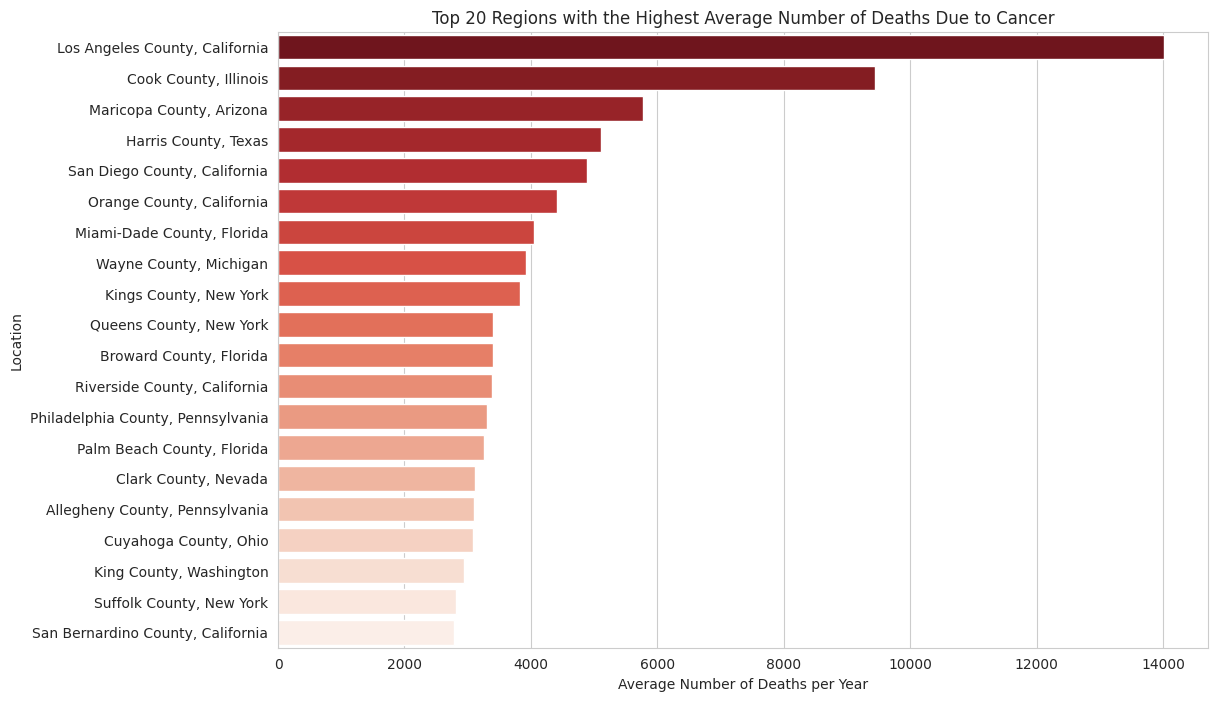

In [ ]:
# Plotting the top 20 regions with the highest average number of deaths due to cancer
top_deaths = sorted_deaths.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='avgdeathsperyear', y='location', hue='location', data=top_deaths, palette='Reds_r', dodge=False)
plt.title('Top 20 Regions with the Highest Average Number of Deaths Due to Cancer')
plt.xlabel('Average Number of Deaths per Year')
plt.ylabel('Location')
plt.legend([],[], frameon=False)
plt.show()

This plot uses a horizontal bar chart, which is effective for displaying the location names without clutter. The Reds_r color palette is used to emphasize the severity with darker colors indicating higher numbers. This visualization helps in quickly identifying regions where cancer mortality is particularly high, which can be crucial for targeted healthcare interventions and resource allocation.
<br>
These are the top 5 regions with highest number of average deaths:
- **Los Angeles County, California**
- **Cook County, Illinois**
- **Maricopa County, Arizona**
- **Harris County, Texas**
- **San Diego County, California**

This means that they have the highest cancer mortality and might need more healthcare resources or targeted cancer prevention programs. Specifically, several counties in California are visibly affected by high mortality rates. This could be due regional characteristics like economic status, access to medical care, or prevalence of risk factors.

**Research Question 4**: What is the average median income and median age in these regions with highest average deaths?

Since we narrowed down the top 20 regions with the highest average number of deaths, we can filter the dataset to include only these regions for the subsequent analysis. The two code cells below show the top locations, and the data associated with those specific locations. Note that the table produced by top_regions_data shows the leftmost column that numbers each row within the dataset that was extracted.

In [ ]:
top_locations = top_deaths['location'].tolist()
top_locations

['Los Angeles County, California',
 'Cook County, Illinois',
 'Maricopa County, Arizona',
 'Harris County, Texas',
 'San Diego County, California',
 'Orange County, California',
 'Miami-Dade County, Florida',
 'Wayne County, Michigan',
 'Kings County, New York',
 'Queens County, New York',
 'Broward County, Florida',
 'Riverside County, California',
 'Philadelphia County, Pennsylvania',
 'Palm Beach County, Florida',
 'Clark County, Nevada',
 'Allegheny County, Pennsylvania',
 'Cuyahoga County, Ohio',
 'King County, Washington',
 'Suffolk County, New York',
 'San Bernardino County, California']

In [ ]:
top_regions_data = merged_data[merged_data['location'].isin(top_locations)]
top_regions_data.head()

,avgcasecount,avgdeathsperyear,target_deathrate,incidencerate,medianincome,popest2015,povertypercent,clintrialspercap,binnedinc,medianage,...,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize,majority_insurance_type
112,1962.667684,3120,167.7,453.549422,51241,2114801,15.6,405.239075,"(51046.4, 54545.6]",36.4,...,63.750484,10.836856,9.169757,10.145895,43.813065,5.125073,32,3,2.78,Private
299,8999.000000,2939,152.7,464.200000,75738,2117125,11.3,620.653008,"(61494.5, 125635]",37.2,...,68.068382,6.198491,15.576735,2.803169,46.850306,5.202119,53,33,2.45,Private
365,10411.000000,3927,197.9,528.700000,41434,1759335,24.1,470.063973,"(40362.7, 42724.4]",37.8,...,53.342526,39.414346,2.904772,1.728810,37.156645,5.676241,26,163,2.63,Private
386,11217.000000,3824,153.8,452.300000,47547,2636735,23.4,42.476775,"(45201, 48021.6]",34.4,...,43.391084,33.540583,11.478238,8.873103,37.530399,5.227447,36,47,2.74,Private
999,38150.000000,14010,148.4,405.500000,55686,10170292,18.7,255.941521,"(54545.6, 61494.5]",35.6,...,53.258710,8.276140,14.129380,19.591522,44.581650,4.705281,6,37,3.02,Private


Based on the data above, the average metrics associated with median income and median age can be calculated, and to visualize the association between average median income and median age in these regions, a scatter plot can be effective. Each point can represent a region, with the x-axis for median age and the y-axis for median income.

In [ ]:
average_metrics = top_regions_data.groupby('location').agg({
    'medianincome': 'mean',
    'medianage': 'mean'
}).reset_index()

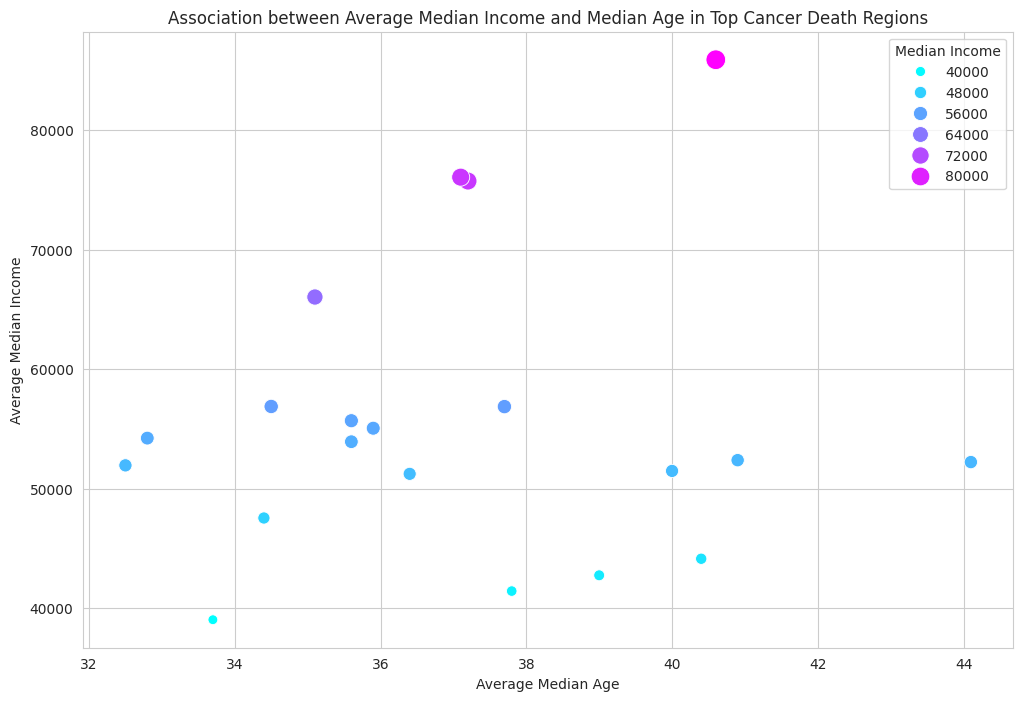

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='medianage', y='medianincome', data=average_metrics, size='medianincome', hue='medianincome', palette='cool', sizes=(50, 200))
plt.title('Association between Average Median Income and Median Age in Top Cancer Death Regions')
plt.xlabel('Average Median Age')
plt.ylabel('Average Median Income')
plt.legend(title='Median Income')
plt.grid(True)
plt.show()

Based on the scatterplot above, several insights can be made into the associations between average median income, average median age, and the regions with the highest deaths. Firstly, it is visible that regions with lower average median incomes are clustered towards the bottom-left of the plot. This suggests that people with lower incomes were not able to extend their lives and died sooner than those with higher incomes that were able to survive up to a relative age of 37 or higher. Second, it is important to note that no matter the income, there were deaths from cancer regardless which suggests regions with higher average median incomes were not able to avoid death, only delay it, since most deaths for these regions occurred between ages 40 and 45.

**Research Question 5**: Is there a pattern associated with the poverty percentage and the incident rate?

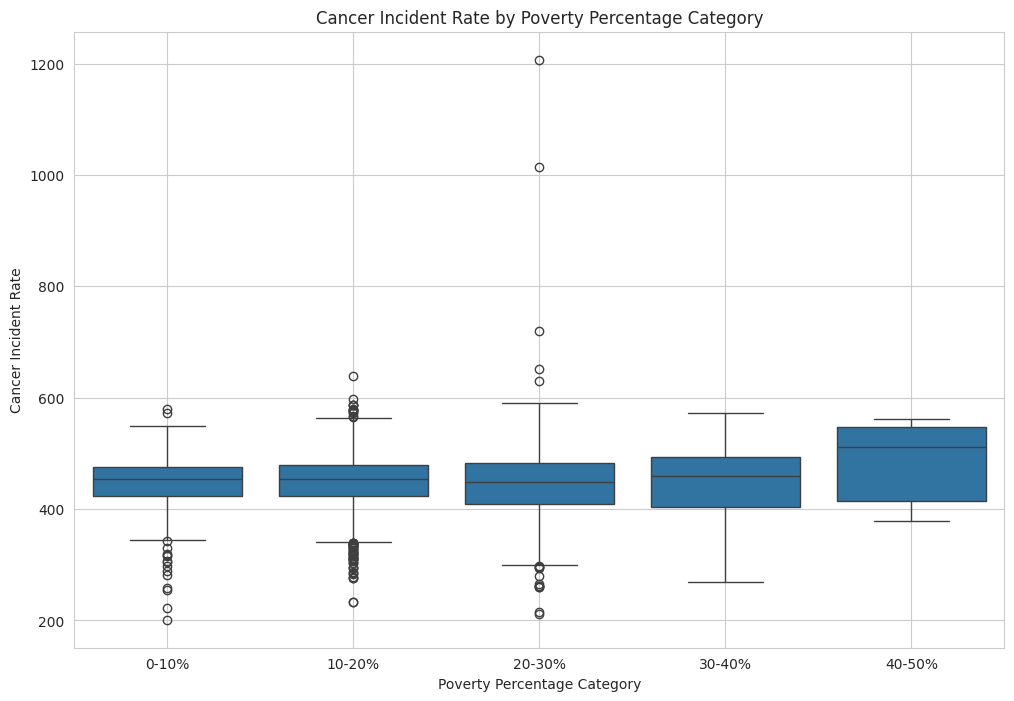

In [ ]:
# Categorizing poverty percentage into bins
merged_data['poverty_category'] = pd.cut(merged_data['povertypercent'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%'])

plt.figure(figsize=(12, 8))
sns.boxplot(x='poverty_category', y='incidencerate', data=merged_data)
plt.title('Cancer Incident Rate by Poverty Percentage Category')
plt.xlabel('Poverty Percentage Category')
plt.ylabel('Cancer Incident Rate')
plt.grid(True)
plt.show()

Based on the box plot above, we can gain several insights about the data involved.
1. **Median Incident Rate:**<br>
>The median cancer incident rate (indicated by the horizontal line inside each box) appears relatively stable across the poverty categories. There is a slight increase in the median value as poverty percentage increases from 0-10% to 10-20%, but it remains fairly consistent in higher poverty categories.<br>
2. **Interquartile Range (IQR):**<br>
>The IQR, which represents the middle 50% of the data (the height of the boxes), varies across categories. The 10-20% poverty category has a slightly tighter IQR compared to the 0-10% category, suggesting less variability in cancer incident rates in the 10-20% category. The IQR widens slightly in the 20-30% category and remains similar in the 30-40% and 40-50% categories.
3. **Outliers:**<br>
>There are numerous outliers in each category, indicated by the dots outside the whiskers of the boxes. These outliers represent counties where the cancer incident rates are significantly higher or lower than the typical rates within that poverty category. The presence of outliers in all categories suggests that factors other than poverty might also significantly influence cancer incident rates.<br>
4. **Range of Data:**<br>
>The whiskers, which indicate the range of the data excluding outliers, show that lower poverty categories (0-10% and 10-20%) have a wider range of cancer incident rates compared to higher poverty categories. This could imply more variability in cancer incident rates in areas with lower poverty.
5. **Comparison Across Categories:**<br>
>The 40-50% poverty category shows a higher median and a slightly higher upper quartile compared to other categories, suggesting a trend where higher poverty might be associated with slightly higher cancer incident rates. However, the difference is not very pronounced.<br>

**What these statistical inferences imply:**<br>
>- Stability in Median Rates: The median cancer incident rates are relatively stable across different levels of poverty, suggesting that while poverty might influence cancer incident rates, its impact is not dramatically different across the range from low to high poverty.
- Influence of Other Factors: The presence of numerous outliers in all categories indicates that other factors (such as access to healthcare, environmental factors, and genetic predispositions) might play a significant role in influencing cancer incident rates.
- Potential Slight Trend: There is a potential slight trend where higher poverty categories might have slightly higher cancer incident rates, but the effect is not stark

**Research Question 6**: To what extent is the average number of deaths within these regions associated with the average median income and poverty percentage within these regions?

To examine the extent to which the average number of deaths within regions is associated with the average median income and poverty percentage, we can use a multivariate analysis approach. Additionally, calculating correlation coefficients will provide a quantitative measure of the relationships.
<br>
Creating scatter plots for each pair of variables (average number of deaths vs. median income, and average number of deaths vs. poverty percentage) with regression lines can help visualize the relationships.

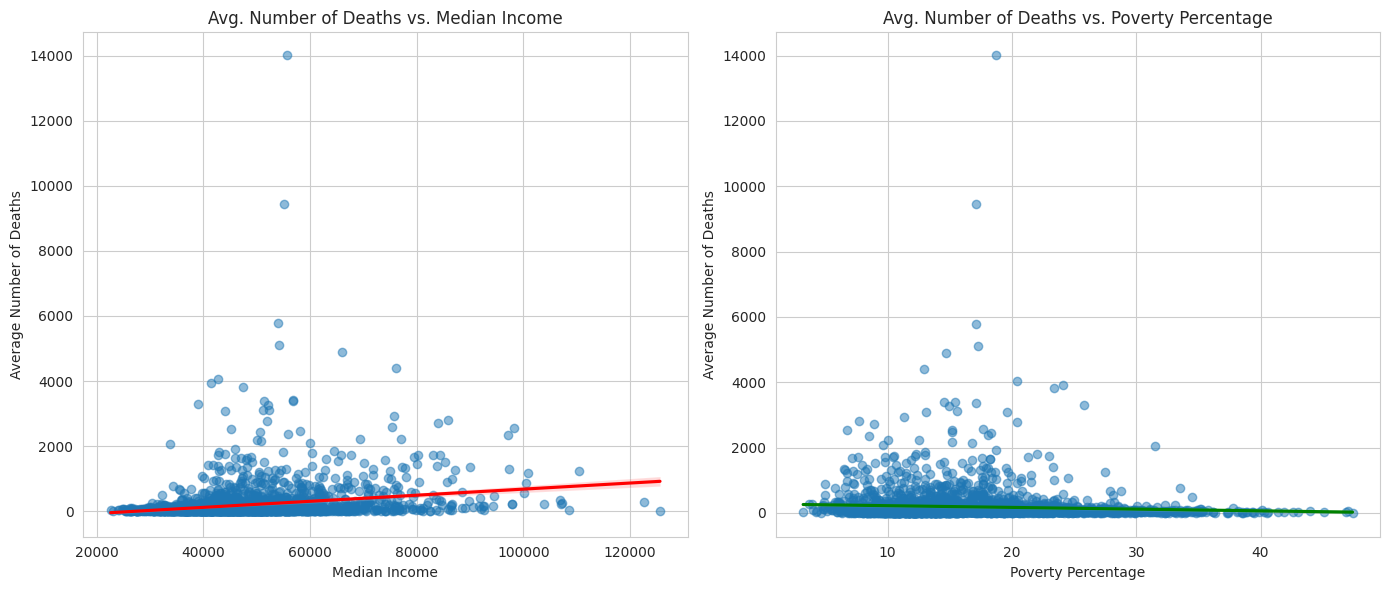

In [ ]:
# Scatter plot: Average Number of Deaths vs. Median Income
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.regplot(x='medianincome', y='avgdeathsperyear', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Avg. Number of Deaths vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Average Number of Deaths')

# Scatter plot: Average Number of Deaths vs. Poverty Percentage
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.regplot(x='povertypercent', y='avgdeathsperyear', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Avg. Number of Deaths vs. Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Average Number of Deaths')

plt.tight_layout()
plt.show()

The **Pearson correlation coefficient**, also known as r, is a statistical measurement of the strength and direction of the linear correlation between two sets of data.

In [ ]:
correlation_income = merged_data[['avgdeathsperyear', 'medianincome']].corr().iloc[0,1]
correlation_poverty = merged_data[['avgdeathsperyear', 'povertypercent']].corr().iloc[0,1]

print(f"Correlation between average number of deaths and median income: {correlation_income}")
print(f"Correlation between average number of deaths and poverty percentage: {correlation_poverty}")

Correlation between average number of deaths and median income: 0.22320675719703434
Correlation between average number of deaths and poverty percentage: -0.06691793872052998


Based on the scatter plots and the correlation coefficients that were calculated, there are several insights that can be made:
1. **Median Income** vs. **Average Number of Deaths**:
- **Correlation Coefficient:** 0.223
> **Interpretation**: There is a weak positive correlation between median income and the average number of deaths. This suggests that as median income increases, there is a slight tendency for the average number of deaths to increase as well. However, the correlation is quite weak, indicating that median income alone may not be a strong predictor of cancer mortality rates. <br> Visual Insight: The scatter plot shows a broad spread of data points with a slight upward trend, but with many exceptions, indicating that other factors likely play significant roles in influencing cancer mortality rates.
2. **Poverty Percentage** vs. **Average Number of Deaths:**
- **Correlation Coefficient:** -0.067
> **Interpretation:** There is a very weak negative correlation between poverty percentage and the average number of deaths. This counterintuitive result suggests that higher poverty slightly correlates with fewer deaths, but the correlation is so weak that it essentially indicates no meaningful linear relationship. <br> **Visual Insight:** The scatter plot shows that the data points are mostly clustered at lower poverty percentages with a wide range of death counts, and there is no clear trend. This indicates that poverty percentage, by itself, does not strongly predict the average number of cancer deaths.

**Complexity of Factors:** The weak correlations suggest that neither median income nor poverty percentage alone strongly determines the average number of cancer deaths in a region. This implies the complexity of cancer mortality rates, which are likely influenced by a multitude of factors including healthcare access, environmental exposures, genetic predispositions, and more. <br>
**Socioeconomic Indicators:** While socioeconomic factors are important, their direct impact on cancer mortality might be obscured by other intervening variables. For instance, higher income regions might have better healthcare facilities, but also higher exposure to carcinogens due to industrial activities, balancing out the expected outcomes.


**Research Question 7**: Is there a pattern associated with incident rate and the average number of deaths with the percentage of minorities?

Within the complexity of factors that relate to cancer mortality rates and incident rates, genetic predispositions are complex to analyze and understand from data. Establishing a link between racial composition and cancer may help understand those associations to a limited extent, since similar racial compositions often show similar geneaology. A scatter plot can be used to visualize these associations.

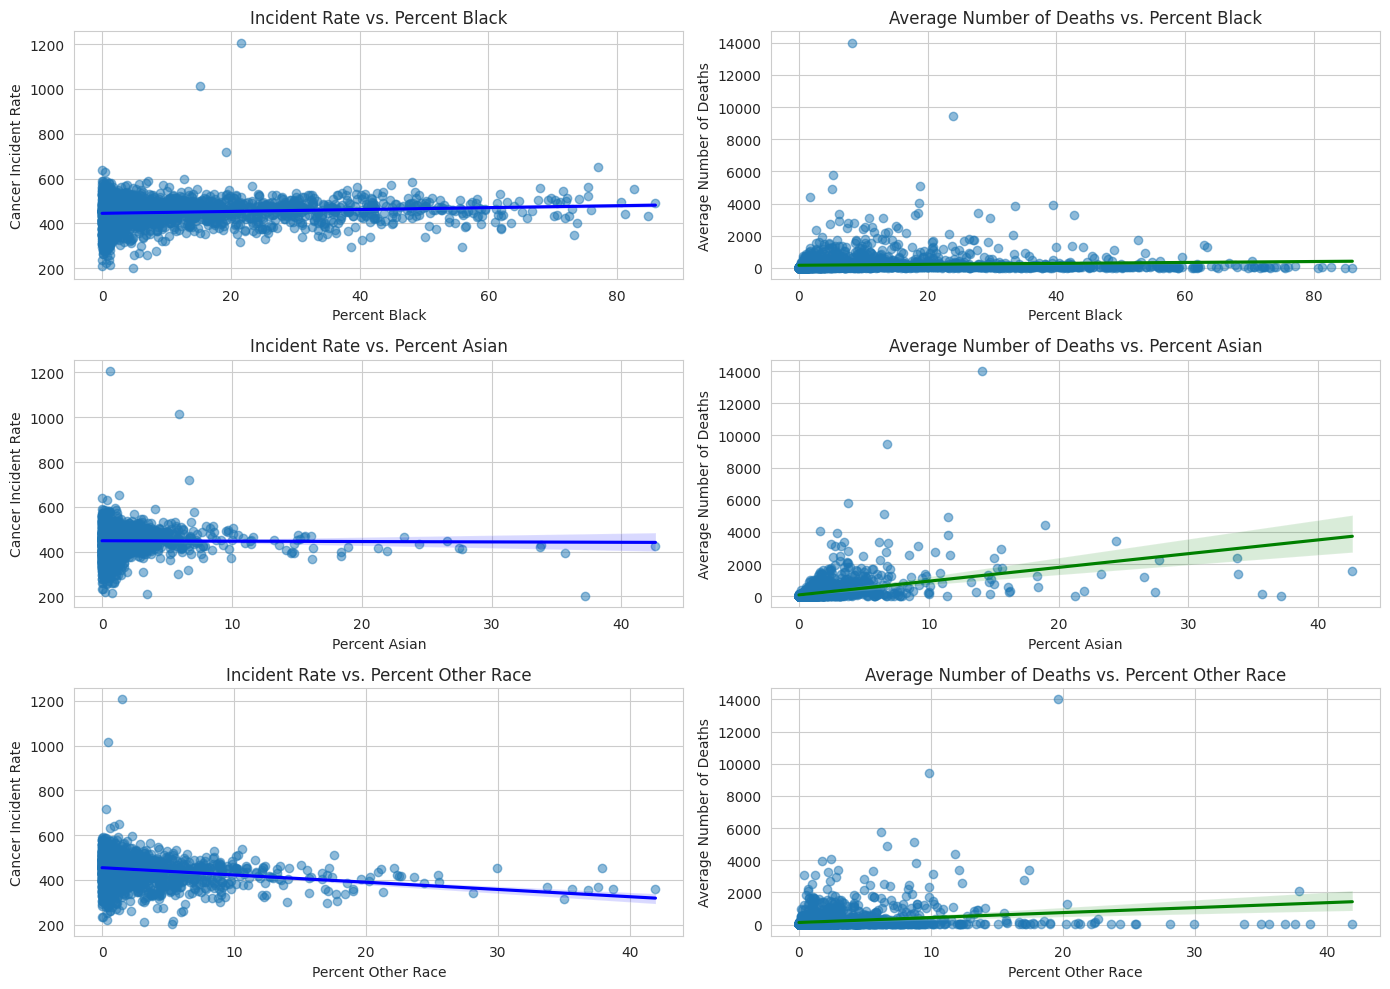

In [ ]:
# Setting up the figure and axes

# Define readable names for the minority groups
minority_groups = ['pctblack', 'pctasian', 'pctotherrace']
readable_names = ['Percent Black', 'Percent Asian', 'Percent Other Race']

fig, axs = plt.subplots(3, 2, figsize=(14, 10))


for i, minority in enumerate(minority_groups):
    # Plot for incident rate
    sns.regplot(x=minority, y='incidencerate', data=merged_data, ax=axs[i, 0], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
    axs[i, 0].set_title(f'Incident Rate vs. {readable_names[i]}')
    axs[i, 0].set_xlabel(readable_names[i])
    axs[i, 0].set_ylabel('Cancer Incident Rate')

    # Plot for average number of deaths
    sns.regplot(x=minority, y='avgdeathsperyear', data=merged_data, ax=axs[i, 1], scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
    axs[i, 1].set_title(f'Average Number of Deaths vs. {readable_names[i]}')
    axs[i, 1].set_xlabel(readable_names[i])
    axs[i, 1].set_ylabel('Average Number of Deaths')

plt.tight_layout()
plt.show()

In [ ]:
for minority in minority_groups:
    correlation_incidence = merged_data[[minority, 'incidencerate']].corr().iloc[0, 1]
    correlation_deaths = merged_data[[minority, 'avgdeathsperyear']].corr().iloc[0, 1]
    print(f"Correlation between {minority} and cancer incident rate: {correlation_incidence}")
    print(f"Correlation between {minority} and average number of deaths: {correlation_deaths}")

Correlation between pctblack and cancer incident rate: 0.11348895935895496
Correlation between pctblack and average number of deaths: 0.08460710216917364
Correlation between pctasian and cancer incident rate: -0.008123427032149001
Correlation between pctasian and average number of deaths: 0.4430742259184566
Correlation between pctotherrace and cancer incident rate: -0.20874833601098114
Correlation between pctotherrace and average number of deaths: 0.215149358689697


The results from the scatter plots and correlation coefficients provide insights into the relationship between the percentage of different minority groups and both cancer incident rates and average number of deaths:
1. Percent Black Population:
> **Incident Rate Correlation**: 0.113 <br>
There is a weak positive correlation between the percentage of Black population and cancer incident rates. This suggests a slight increase in cancer incidence as the percentage of Black population increases. <br>
> **Average Number of Deaths Correlation**: 0.085 <br>
Similarly, there is a weak positive correlation with the average number of deaths, indicating a slight increase in deaths as the Black population percentage increases.<br>
>**Visual Insight**: The scatter plots show a broad spread with a slight upward trend in both incident rates and deaths, but the correlation is weak, suggesting other factors also play significant roles.
2. Percent Asian Population:
> **Incident Rate Correlation**: -0.008 <br>
There is virtually no correlation between the percentage of Asian population and cancer incident rates, indicating no significant relationship. <br>
>**Average Number of Deaths Correlation**: 0.443 <br>
There is a moderate positive correlation with the average number of deaths. This is a significant finding, suggesting that areas with higher percentages of Asian populations might experience higher cancer mortality, although the reason for this is not clear from the data alone. <br>
>**Visual Insight**: The scatter plot for deaths shows a more noticeable upward trend, especially compared to the incident rate plot, which is relatively flat.
3. Percent Other Race Population:
> **Incident Rate Correlation**: -0.209 <br>
There is a weak negative correlation between the percentage of Other races and cancer incident rates, suggesting that higher diversity might correlate with slightly lower cancer incidence rates. <br>
>**Average Number of Deaths Correlation**: 0.215 <br>
There is a weak positive correlation with the average number of deaths, indicating a slight increase in deaths as the percentage of Other races increases. <br>
>**Visual Insight**: The scatter plots show a downward trend for incident rates and a slight upward trend for deaths, aligning with the correlation findings.

Diverse Influences: The correlations suggest that the influence of racial composition on cancer rates and deaths is complex and varies by race. The moderate correlation between the Asian population percentage and deaths is particularly notable and warrants further investigation. <br>
Potential Confounders: These relationships could be influenced by a variety of factors, including but not limited to socioeconomic status, access to healthcare, genetic predispositions, and environmental exposures.

**Research Question 8**: What is the correlation between the percentage of white population, cancer incident rates and average number of deaths?

After answering the previous question, we were able to understand the extent of the correlations between minority races and cancer. It is also important to understand if there are any associations between the majority race, the white population, and cancer. To effectively answer this question, we could explore the data related to the white population further.

In [ ]:
# Calculate the number of white individuals per entry
merged_data['white_population'] = merged_data['pctwhite'] / 100 * merged_data['popest2015']
# Group by region and sum up the white population
white_population_per_region = merged_data.groupby('location')['white_population'].mean()
white_population_per_region

location
Abbeville County, South Carolina      17424.572550
Acadia Parish, Louisiana              49418.948315
Accomack County, Virginia             22424.427992
Ada County, Idaho                    396879.343669
Adair County, Iowa                     7117.039591
                                         ...      
Yukon-Koyukuk Census Area, Alaska      1286.197024
Yuma County, Arizona                 157580.581143
Yuma County, Colorado                  9552.282180
Zapata County, Texas                  13969.141041
Zavala County, Texas                  11153.531509
Name: white_population, Length: 3047, dtype: float64

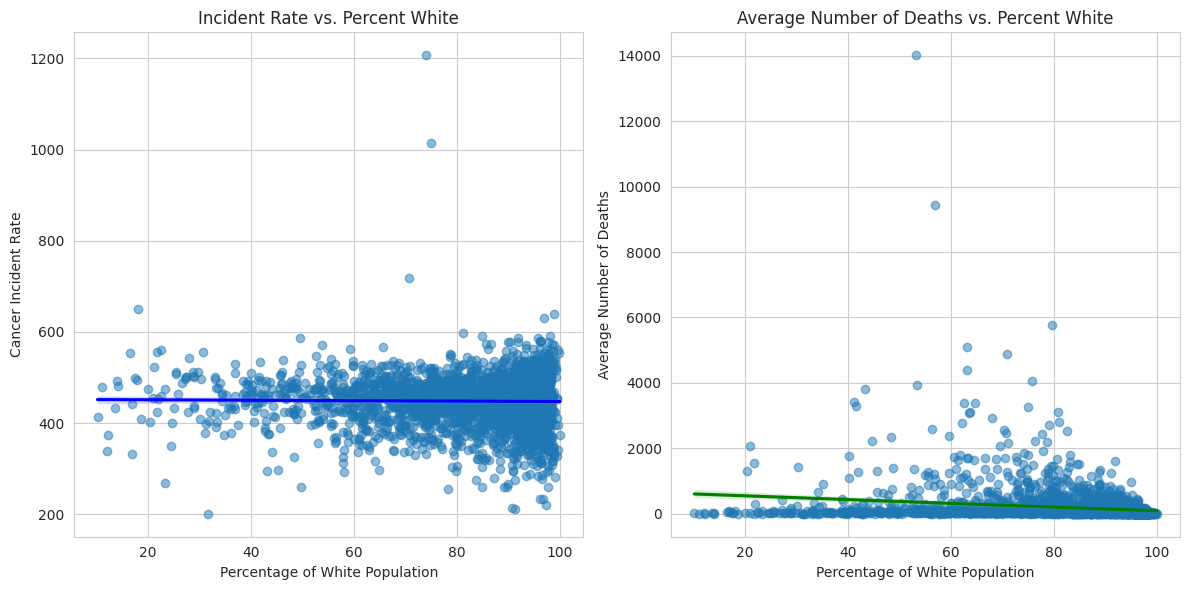

In [ ]:
# Setting up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plotting percentage of white population against incident rate
sns.regplot(x='pctwhite', y='incidencerate', data=merged_data, ax=axs[0], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
axs[0].set_title('Incident Rate vs. Percent White')
axs[0].set_xlabel('Percentage of White Population')
axs[0].set_ylabel('Cancer Incident Rate')

# Plotting percentage of white population against average number of deaths
sns.regplot(x='pctwhite', y='avgdeathsperyear', data=merged_data, ax=axs[1], scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
axs[1].set_title('Average Number of Deaths vs. Percent White')
axs[1].set_xlabel('Percentage of White Population')
axs[1].set_ylabel('Average Number of Deaths')

plt.tight_layout()
plt.show()

In [ ]:
correlation_incidence = merged_data[['pctwhite', 'incidencerate']].corr().iloc[0, 1]
correlation_deaths = merged_data[['pctwhite', 'avgdeathsperyear']].corr().iloc[0, 1]
print(f"Correlation between pctwhite and cancer incident rate: {correlation_incidence}")
print(f"Correlation between pctwhite and average number of deaths: {correlation_deaths}")

Correlation between pctwhite and cancer incident rate: -0.014509829490172895
Correlation between pctwhite and average number of deaths: -0.18715902284470992


The results from the scatter plots and correlation coefficients provide insights into the relationship between the percentage of the white population and both cancer incident rates and average number of deaths:
1. Percent White Population vs. Cancer Incident Rate:
> **Correlation Coefficient**: -0.0145 <br>
This value indicates a very weak negative correlation between the percentage of the white population and cancer incident rates. Essentially, this suggests that there is no significant relationship, as the correlation is close to zero. <br>
> **Visual Insight**: The scatter plot for incident rates shows a largely horizontal trend line, reinforcing the statistical finding that changes in the percentage of the white population do not significantly affect cancer incident rates.
2. Percent White Population vs. Average Number of Deaths:
> **Correlation Coefficient**: -0.187 <br>
This value indicates a weak negative correlation between the percentage of the white population and the average number of deaths. This suggests that higher percentages of white population might be associated with slightly lower average numbers of cancer deaths, but the relationship is not strong. <br>
>**Visual Insight**: The scatter plot for average number of deaths shows a slight downward trend as the percentage of the white population increases. However, the spread of data points suggests that other factors likely play a more significant role in influencing the average number of deaths.

**Weak Influence:** The percentage of the white population shows very weak to weak negative correlations with both cancer incident rates and average number of deaths. This implies that the racial composition, specifically the percentage of the white population, has minimal impact on these outcomes. <br>
**Potential Confounders:** Given the weak correlations, it is likely that other factors such as socioeconomic status, access to healthcare, environmental factors, and lifestyle choices have a more pronounced impact on cancer rates and mortality.

After delving into the following questions, the possibility of an association between race and the average rates of death due to cancer had ultimately piqued our interest, which we will be modelling our null hypothesis on:

##**Part 3: Constructing a Hypothesis Test**

Given the following data, interest had arisen amongst the three of us to inquire more about the implications of the percentage of race of any given region to the average number of deaths. Our first step therefore was to ask the following: Is there a correlation between the percentages of every race and the average number of deaths per year due to cancer?

### **Section 5: Constructing a Null Hypothesis**

**Null Hypothesis (H₀)**: There is no correlation between the percentage between race and the average number of deaths per year.


**Hypothesis (Hₐ)**: There is a correlation between the percentage of race and the average number of deaths per year.

The following four tables have therefore been constructed containing the relevant statistics:
1. **Independent variables:** pctwhite, pctblack, pctasian, pctotherrace <br>
> By using the percentage of caucasian individuals, we will be able to gauge whether higher percentages of of minorities ultimately correlate to more deaths (four tables will be created respectively).<br>
2. **Dependent Variable:** avgdeathsperyear<br>
> This is the metric in which we will use to gauge if there is any sort of discrimination.

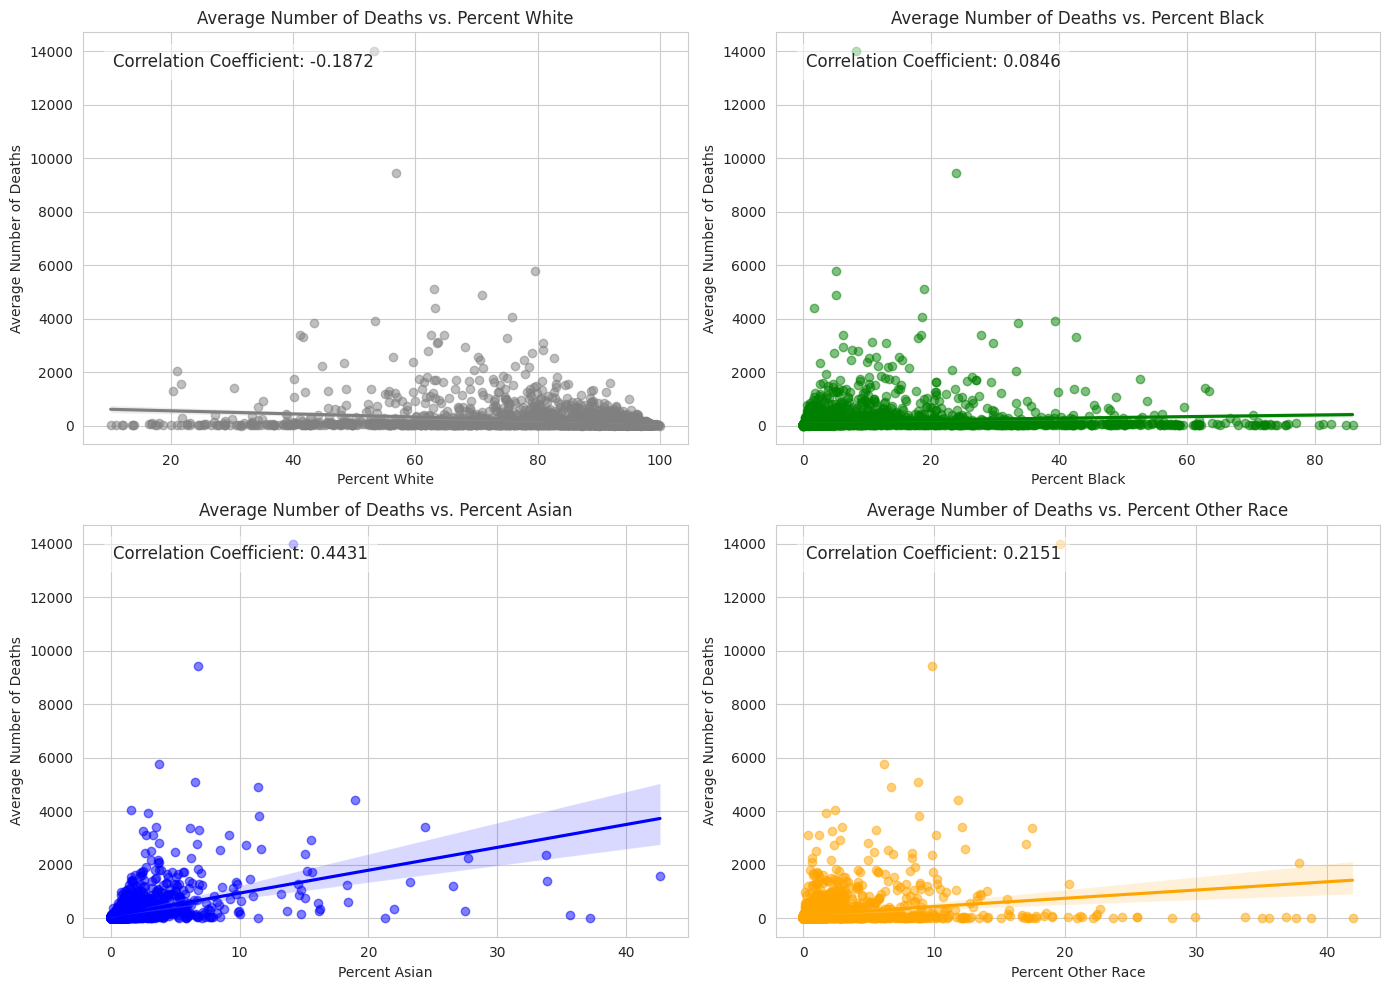

In [ ]:
# Define readable names for the race groups
all_groups = ['pctwhite', 'pctblack', 'pctasian', 'pctotherrace']
readable_names = ['Percent White', 'Percent Black', 'Percent Asian', 'Percent Other Race']
colors = ['grey', 'green', 'blue', 'orange']
original_correlations = []

for group in all_groups:
    correlation = merged_data[[group, 'avgdeathsperyear']].corr().iloc[0, 1]
    original_correlations.append(correlation)

# Create a 2x2 grid of subplots, with need to flatten
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten() # simplify indexing

for i, group in enumerate(all_groups):

    # Plot for average number of deaths vs. each group
    sns.regplot(x=group, y='avgdeathsperyear', data=merged_data, ax=axs[i],
                scatter_kws={'alpha': 0.5, 'color': colors[i]}, line_kws={'color': colors[i]})
    axs[i].set_title(f'Average Number of Deaths vs. {readable_names[i]}')
    axs[i].set_xlabel(readable_names[i])
    axs[i].set_ylabel('Average Number of Deaths')

    # Annotate the plot with the correlation coefficient
    axs[i].text(0.05, 0.95, f'Correlation Coefficient: {original_correlations[i]:.4f}', transform=axs[i].transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()



####**Testing Process**

1. **Initial Thoughts**:<br>
> Here we can see that there are non-zero correlations between all four races, with an inverse relationship for more caucasion dense populations. Although there are non-zero correlation coefficients, we can not infer this correlation without further analysis. I will therefore be conducting a randomization test for these four variables to determine if the correlation at hand is truly a correlation or if it is simply a correlated purely by chance.<br>
2. **Choosing a Sample Size:**<br>
> I will use the whole sample, since the sample size is small and the calculations can be done with most computational resources. There is also no need to worry about integrity, since the dataset is public, and overfitting isn't and issue as this dataset is no longer being updated.
3. **Final Data Cleaning for the Randomization Test:**<br>
> I decided to create a table with only the relevant data to make manipulation easier.<br>
4. **Carrying Out The Test**: <br>
> Create a new table of correlation data by shuffling the labels of each individual group 10000 times and take their new correlations each time, then appending to this new table.<br>
5. **Plot and draw Conclusions:**<br>
> Create 4 Histograms based on the randomization test to better visualize the data and finally reject or fail to reject our null hypothesis based on our findings, as well as provide any other interesting insights.<br>

In following these 5 steps, we ultimately construct a solid hypothesis test to  explore our data even further.

The following code is the final cleaning (**Step 3**) before testing. <br>(equivalent to CREATE TABLE with the following parameters)

In [ ]:
shuffled_labels = pd.DataFrame({
    'avgdeathsperyear':merged_data['avgdeathsperyear'],
    'pctwhite':merged_data['pctwhite'],
    'pctblack':merged_data['pctblack'],
    'pctasian':merged_data['pctasian'],
    'pctotherrace':merged_data['pctotherrace']
})

shuffled_labels.head()

,avgdeathsperyear,pctwhite,pctblack,pctasian,pctotherrace
0,469,81.780529,2.594728,4.821857,1.843479
1,70,89.228509,0.969102,2.246233,3.741352
2,50,90.922190,0.739673,0.465898,2.747358
3,202,91.744686,0.782626,1.161359,1.362643
4,26,94.104024,0.270192,0.665830,0.492135


Using the previously constructed table, this portion handles the brunt of the calculations by creating a matrix of the four corresponding races, shuffling all of their labels and finally finding the correlation between these newly shuffled distributions, to ultimately plot on their corresponding group's distribution column (**Step 4**). This is done until the number of samples N = 10000 is reached. Finally, the matrix is converted to a pandas dataframe. The whole computation takes roughly 5 minutes.


In [ ]:
#Running of the A/B Test
randomized_correlations_matrix = {group: [] for group in all_groups}
randomized_correlations_matrix

for group in shuffled_labels:

  repetitions = 10000
  for i in range(repetitions):
    for group in all_groups:
      shuffled_labels[group] = shuffled_labels[group].sample(frac=1).reset_index(drop=True)
      randomized_correlations_matrix[group].append(shuffled_labels[[group, 'avgdeathsperyear']].corr().iloc[0,1])

In [ ]:
#Converting dictionary to a create Table in pandas
all_randomized_correlations = pd.DataFrame(randomized_correlations_matrix)
all_randomized_correlations.head()

,pctwhite,pctblack,pctasian,pctotherrace
0,-0.000321,-0.017091,-0.015669,0.064692
1,-0.002450,0.020622,0.019630,-0.003336
2,-0.002752,-0.014886,0.025334,0.016433
3,0.012001,0.004291,-0.012982,-0.000590
4,0.030806,-0.003708,-0.000588,-0.005970


Finally, using the newly-constructed table based on the correlation values, we plot all four histograms using methods previous. We also plot the p-values (original oberved data) in which we can make our statistical inferences (reject or fail to reject the null hypothesis)(**Step 5**).

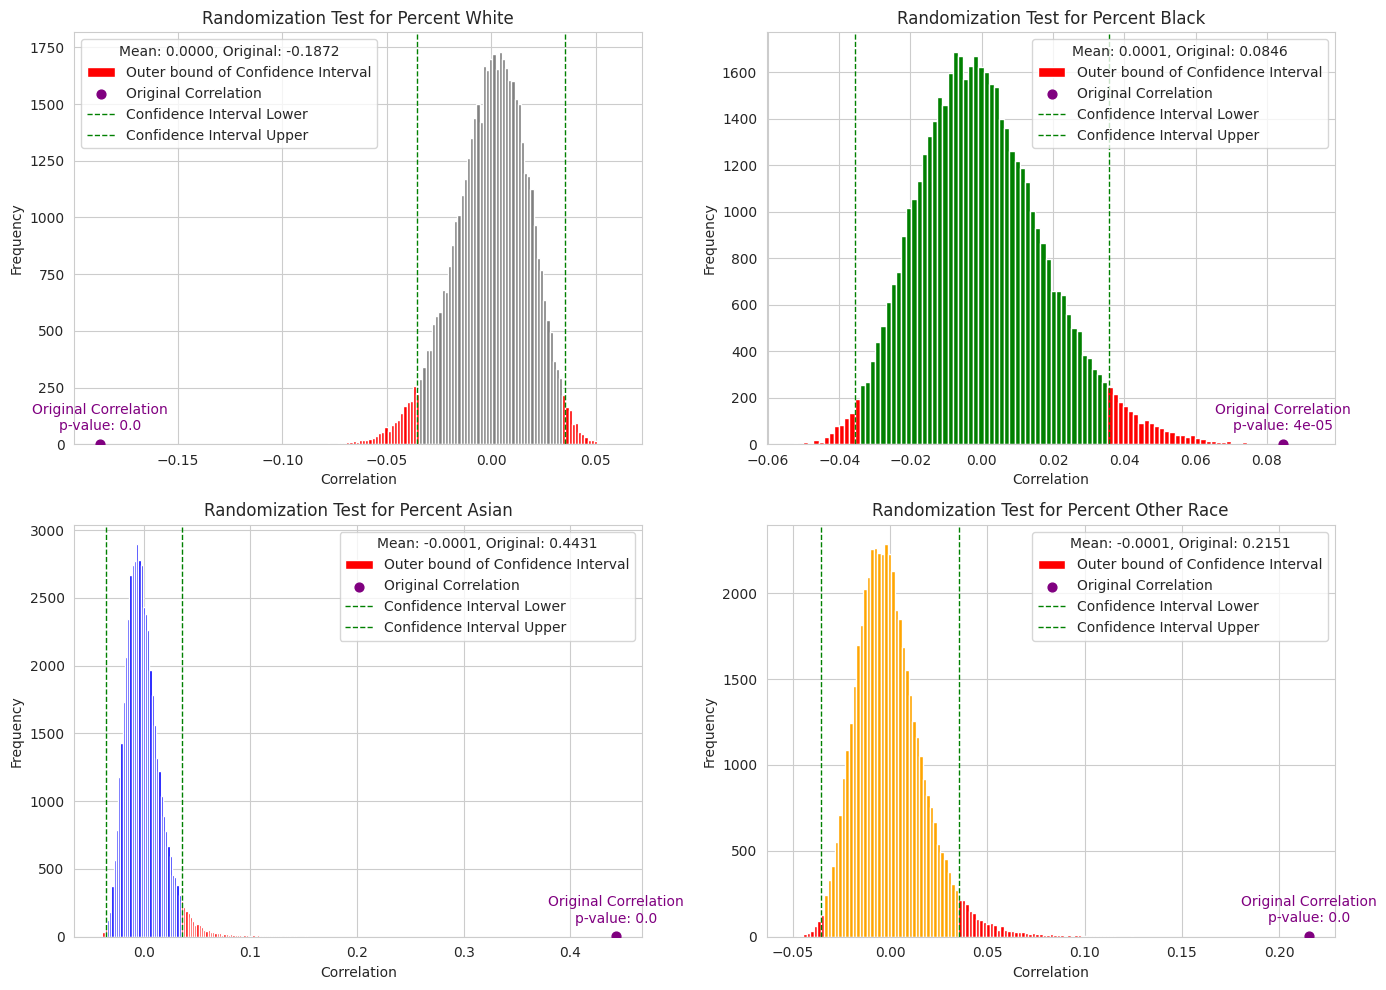

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()  # Flatten the array of Axes for easy iteration

for i in range(len(readable_names)):
    randomized_correlations = all_randomized_correlations.iloc[:, i]
    original_corr = original_correlations[i]
    p_value = (randomized_correlations >= abs(original_corr)).sum() / len(randomized_correlations)

    # Creation of Confidence Interval
    z_score = 1.96
    mean = randomized_correlations.mean()
    std_dev = randomized_correlations.std()
    ci_lower = mean - z_score * std_dev
    ci_upper = mean + z_score * std_dev

    # Plot histogram for the current group
    n, bins, patches = axs[i].hist(randomized_correlations, bins=100, color=colors[i], alpha=1, label='Outer bound of Confidence Interval')

    # Changing the color of the bins outside of the confidence interval to red
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if leftside < ci_lower or rightside > ci_upper:
            plt.setp(patch, 'facecolor', 'red')

    # Add a purple point for the observed data on the x-axis
    label='Confidence Interval'
    p_value_label = 'Original Correlation\np-value: ' + str(p_value)
    axs[i].scatter(original_corr, 2, color='purple', s=40, zorder=5, label='Original Correlation')

    # Annotate with the p-value
    axs[i].annotate(p_value_label, (original_corr, 2), textcoords="offset points", xytext=(0,10), ha='center', color='purple')

    # Add vertical lines for the confidence interval bounds
    axs[i].axvline(ci_lower, color='green', linestyle='dashed', linewidth=1, label='Confidence Interval Lower')
    axs[i].axvline(ci_upper, color='green', linestyle='dashed', linewidth=1, label='Confidence Interval Upper')

    # Label the subplot
    axs[i].set_title(f'Randomization Test for {readable_names[i]}')
    axs[i].set_xlabel('Correlation')
    axs[i].set_ylabel('Frequency')

    # Legend for the subplot
    axs[i].legend(title=f"Mean: {mean:.4f}, Original: {original_corr:.4f}")

plt.tight_layout()
plt.show()

###**Section 6: Rejecting the Null Hypothesis**
Given the following results from the histograms and correlation coefficients we can make inferences about their following respective correlations:
1. Percent White Population:
> **Correlation Mean**: 0.0001 <br>
Based on the Hypothesis test, The randomization test asumes that there is no correlation between the percentage of black individuals and average number of deaths per year. <br>
> **P-value for Percentage of White**: 0.000 <br>
This indicates that the following value is the most statistically significant point on the graph, which gives us grounds to reject the null hypothesis.<br>
> **Visual Anomalies:** Skewed Right<br> This graph, unlike the other 3, is skewed right, indicating a bias towards negative random sample correlations.
2. Percent Black Population:<br>
> **Correlation Mean**: 0 <br>
Based on the Hypothesis test, The randomization test asumes that there is no correlation between the percentage of black individuals and average number of deaths per year. <br>
> **p-value for Percentage of Black**: 0.0002 <br>
This indicates that the following value is the more statistically significant than at least 99.5% of the points on the graph, which gives again gives us grounds to reject the null hypothesis.<br>
> **Visual Anomalies:** Skewed Left <br>This graph is skewed left, suggesting a bias towards positive random sample correlations.<br>
3. Percent Asian Population:
> **Correlation Mean**: 0.0000 <br>
Based on the Hypothesis test, The randomization test asumes that there is no correlation between the percentage of black individuals and average number of deaths per year. <br>
> **P-value for Percentage of Asian**: 0.0000 <br>
This indicates that the following value is the most statistically significant point on the graph, which gives also us grounds to reject the null hypothesis.<br>
> **Visual Anomalies:** Skewed Left, extremely far p-value <br>This graph is also skewed left, also suggesting a bias towards positive random sample correlations. Another noticeable difference is that this histogram's p-value has the largest z-score out of any other observed value. This could be indicative of an extremely strong correlation in comparison to the rest of the tested data.
3. Percent Other Population:
> **Correlation Mean**: 0.0000 <br>
Based on the Hypothesis test, The randomization test asumes that there is no correlation between the percentage of black individuals and average number of deaths per year <br>
> **P-value for Percentage of Other**: 0.0000 <br>
This indicates that the following value is the most statistically significant point on the graph, which allows us to reject the null hypothesis.<br>
> **Visual Anomalies:** Skewed Left <br>This graph is skewed left, also suggesting a bias towards positive random sample correlations.<br>

**P-value based on the Bonferroni correction:**<br>
Using the bonferroni correction, we can infer correlation of race based on all 4 values:



In [ ]:
bonferroni_correction = (0+0+0+0.0002)/4
bonferroni_correction

5e-05


**Final Thoughts:**

Based on the following findings (p-value 5e--5), it is clear that we can reject the null hypothesis: there is indeed a correlation between the density of the population of any and death rates. We can also see that these correlations are positive for minorities, meaning as the percentage of black, asian, and other races increased, so did the average cancer deaths per year. What is intruging, however is when put into perspective with the white population, we see the exact opposite correlation. This suggests there could a potential pattern that could be interpreted as discrimination, given more comprehensive analysis.

#**Part 4: Conclusion**
Based on the analysis and manipulations of the cancer regression dataset, as well as the variety of tests we had conducted, we only begin to scratch the surface of the complexities of many different parameters and their relationships towards one another. From the data, we had been able to infer a positive correlation between the percentage of minorities in a region, and an inverse correlation in the caucasian population. When looking at the previous questions that pit the death rate against the incidence rate, it is even more indicative of the possibility that even thoiugh cancer affects people indiscriminately, as shown by the near-zero correlations for incidence rate, it still seems to discriminate in terms of deaths. In beginning to unravel all of these intricacies may we be able to tackle this epidemic at hand with the rigor necessary to stop its killing, whether biased or not.

In [ ]:
!jupyter nbconvert --to html ///content/PatrickFinalProject2.ipynb

[NbConvertApp] Converting notebook ///content/PatrickFinalProject2.ipynb to html
[NbConvertApp] Writing 2283993 bytes to /content/PatrickFinalProject2.html
